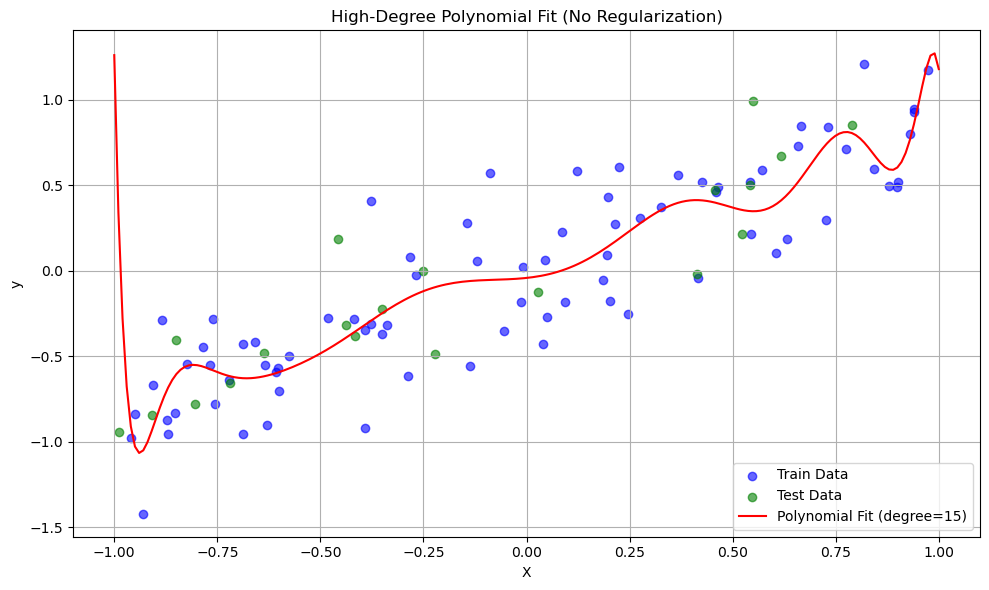

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Generate synthetic data (same as Day 22)
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1) - 1, axis=0)  # [-1, 1]
y = X**5 - X**3 + X + 0.3 * np.random.randn(100, 1)  # complex non-linear + noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a high-degree polynomial model (no regularization for baseline)
degree = 15
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, color="green", label="Test Data", alpha=0.6)

# Predict
X_range = np.linspace(-1, 1, 200).reshape(-1, 1)
y_pred = model.predict(X_range)
plt.plot(X_range, y_pred, color="red", label="Polynomial Fit (degree=15)")

plt.title("High-Degree Polynomial Fit (No Regularization)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


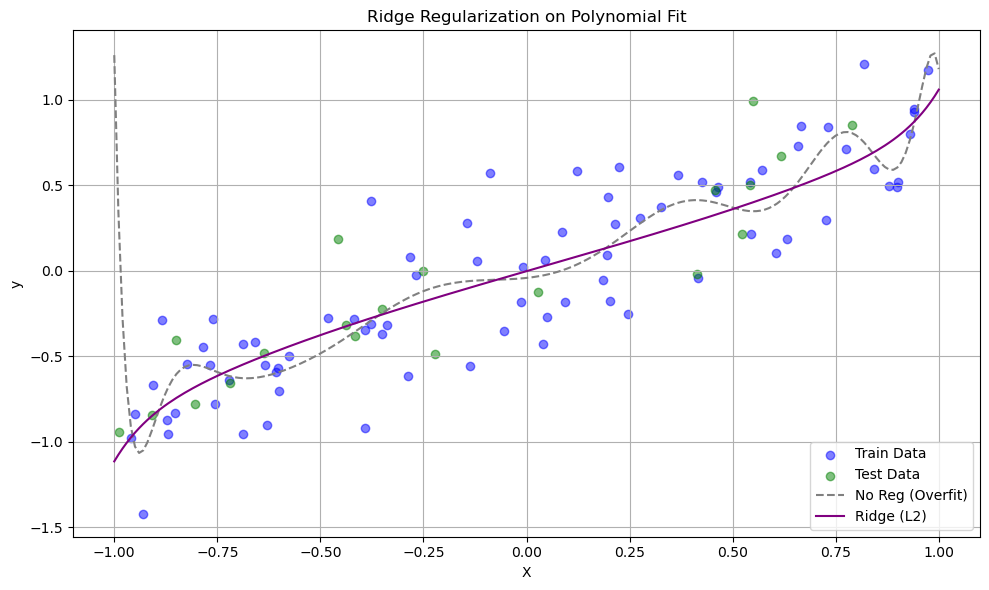

In [32]:
from sklearn.linear_model import Ridge

# Ridge model pipeline
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

# Prediction for Ridge
y_ridge_pred = ridge_model.predict(X_range)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Train Data")
plt.scatter(X_test, y_test, color="green", alpha=0.5, label="Test Data")
plt.plot(X_range, y_pred, color="gray", linestyle="--", label="No Reg (Overfit)")
plt.plot(X_range, y_ridge_pred, color="purple", label="Ridge (L2)")

plt.title("Ridge Regularization on Polynomial Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


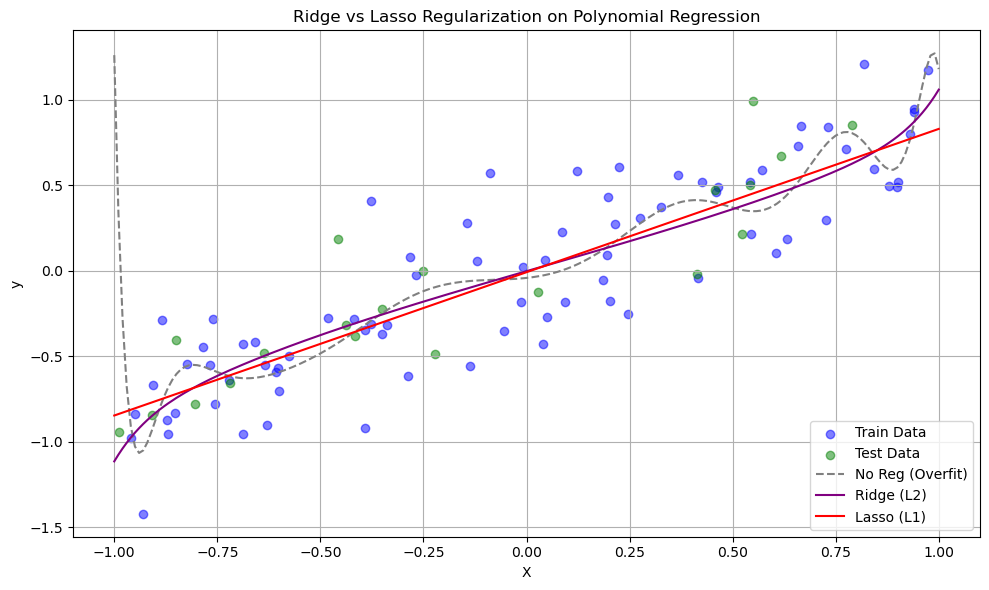

In [34]:
from sklearn.linear_model import Lasso

# Lasso model pipeline
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.01, max_iter=10000))
lasso_model.fit(X_train, y_train)

# Prediction for Lasso
y_lasso_pred = lasso_model.predict(X_range)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Train Data")
plt.scatter(X_test, y_test, color="green", alpha=0.5, label="Test Data")
plt.plot(X_range, y_pred, color="gray", linestyle="--", label="No Reg (Overfit)")
plt.plot(X_range, y_ridge_pred, color="purple", label="Ridge (L2)")
plt.plot(X_range, y_lasso_pred, color="red", label="Lasso (L1)")

plt.title("Ridge vs Lasso Regularization on Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
# Extract coefficients
plain_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
plain_model.fit(X_train, y_train)

coef_plain = plain_model.named_steps['linearregression'].coef_.ravel()
coef_ridge = ridge_model.named_steps['ridge'].coef_.ravel()
coef_lasso = lasso_model.named_steps['lasso'].coef_.ravel()
coef_df = pd.DataFrame({
    'Feature': [f'x^{i}' for i in range(len(coef_plain))],
    'Plain': coef_plain,
    'Ridge': coef_ridge,
    'Lasso': coef_lasso
})

print(" Coefficient Comparison:\n")
print(coef_df.round(4))


 Coefficient Comparison:

   Feature      Plain   Ridge   Lasso
0      x^0     0.0000  0.0000  0.0000
1      x^1     0.2576  0.6966  0.8379
2      x^2     2.2516 -0.0221 -0.0000
3      x^3     8.7310  0.1536  0.0000
4      x^4    -9.0642 -0.0020 -0.0000
5      x^5   -17.3748  0.0200  0.0000
6      x^6   -42.6438  0.0004 -0.0000
7      x^7  -192.1296  0.0039  0.0000
8      x^8   262.5312 -0.0040 -0.0000
9      x^9  1064.3979  0.0207  0.0000
10    x^10  -451.4951 -0.0047 -0.0000
11    x^11 -2134.0564  0.0442  0.0000
12    x^12   303.3436 -0.0003 -0.0000
13    x^13  1907.1644  0.0655  0.0000
14    x^14   -63.6614  0.0074 -0.0000
15    x^15  -637.0310  0.0823  0.0000
